# Week 11

In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset('tips')
df

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [3]:
from ipywidgets import interact, fixed
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set_context("notebook")


df = sns.load_dataset('tips')

def tip_plot(a, b):

    predict = a*df['total_bill'] + b
    cost = ((predict - df['tip'])**2).sum()

    plt.figure(figsize=(12,7))
    sns.scatterplot(data=df, x="total_bill", y="tip", marker='o')
    x = np.arange(0, 55)
    plt.plot(x, a*x + b, c='b', lw=5, alpha=0.5)
    plt.ylim(0, 11)
    plt.title(f"a={a:.2f}   b={b:.2f}   C(a, b)={cost:.2f}", fontdict={'fontsize':20})
    plt.show()

interact(tip_plot, a=(0.1, 0.2, 0.01), b=(0.0, 1.0, 0.1));

interactive(children=(FloatSlider(value=0.15000000000000002, description='a', max=0.2, min=0.1, step=0.01), Fl…

## Gradient descent

In [4]:
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def descent(Df, x0, l_rate=0.1, nsteps=1000):
    '''
    Performs gradient descent of a given function f.

    Df:
        Differential of f
    x0:
        The xtarrting point.
    l_rate:
        The learning rate.
    nsteps:
        Number of iterations to run.

    Returns:
        A list of points computed during steps of the gradient descent.
    '''

    x = np.array(x0, dtype='float')
    path = [x]
    for i in range(nsteps):
        Dfx = np.array(Df(x))
        x = x - l_rate*Dfx
        path.append(x)
    return path


def plot_descent(f, xlim, ylim, path=None, levels=20):
    '''
    Creates contour plot of a functions and the path
    computed by gradient descent applied to the function.

    f:
        Function to be plotted
    path:
        List of coordinates of points computed by the
        gradient descent algorithm.
    xlim, ylim:
        Tuples with limits of x- and y-values for the contour
        plot of the function.
    levels:
        Specifies levels of the contour plot.
    '''

    plt.figure(figsize=(8, 8))
    x, y = np.meshgrid(np.linspace(*xlim, 1000), np.linspace(*ylim, 1000))
    Z = f(np.vstack([x.ravel(), y.ravel()])).reshape(x.shape)
    plt.contourf(x, y, Z, levels=levels, cmap='bone')
    plt.contour(x, y, Z, levels=levels, colors='gray')
    if path is not None:
        plt.plot([x[0] for x in path], [x[1] for x in path], 'ro-', ms=4)
    plt.show()


def plot_descent_step(f, xlim, ylim, path=None, levels=20, last=None, step=1):
    plot_descent(f=f,
                 xlim=xlim,
                 ylim=ylim,
                 path=path[:last:step],
                 levels=levels)


def plot3d(f, xlim, ylim):
    x = np.linspace(xlim[0], xlim[1], 400)
    y = np.linspace(ylim[0], ylim[1], 400)
    X, Y = np.meshgrid(x, y)
    Z = f(np.array([X, Y]))
    fig = go.Figure(go.Surface(x=X, y=Y, z=Z, colorscale="picnic"))
    fig.update_layout(autosize=False, width=800, height=600)
    fig.show()

In [5]:
def p(x):
    return 2*x[0]**2 + x[1]**2

In [ ]:
plot3d(p, (-5, 5), (-5, 5))

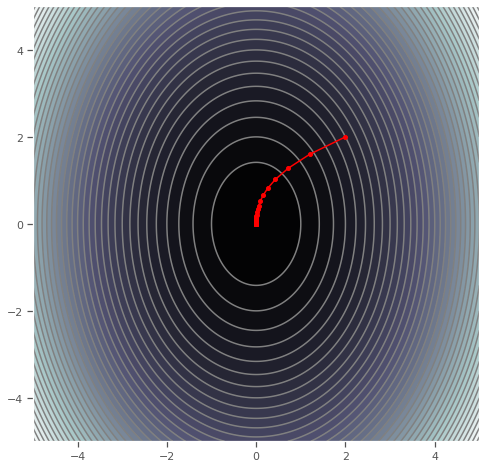

In [11]:
def Dp(x):
    return [4*x[0], 2*x[1]]


path = descent(Dp, x0=[2, 2], l_rate=0.1, nsteps=50)

plot_descent(p, 
             xlim=(-5, 5),
             ylim=(-5, 5),
             path=path,
             levels=40
            );

In [10]:
path

[array([ 2., -3.]),
 array([ 1.2, -2.4]),
 array([ 0.72, -1.92]),
 array([ 0.432, -1.536]),
 array([ 0.2592, -1.2288]),
 array([ 0.15552, -0.98304]),
 array([ 0.093312, -0.786432]),
 array([ 0.0559872, -0.6291456]),
 array([ 0.03359232, -0.50331648]),
 array([ 0.02015539, -0.40265318]),
 array([ 0.01209324, -0.32212255]),
 array([ 0.00725594, -0.25769804]),
 array([ 0.00435356, -0.20615843]),
 array([ 0.00261214, -0.16492674]),
 array([ 0.00156728, -0.1319414 ]),
 array([ 0.00094037, -0.10555312]),
 array([ 0.00056422, -0.08444249]),
 array([ 0.00033853, -0.06755399]),
 array([ 0.00020312, -0.0540432 ]),
 array([ 0.00012187, -0.04323456]),
 array([ 7.31231688e-05, -3.45876451e-02]),
 array([ 4.38739013e-05, -2.76701161e-02]),
 array([ 2.63243408e-05, -2.21360929e-02]),
 array([ 1.57946045e-05, -1.77088743e-02]),
 array([ 9.47676268e-06, -1.41670994e-02]),
 array([ 5.68605761e-06, -1.13336796e-02]),
 array([ 3.41163456e-06, -9.06694365e-03]),
 array([ 2.04698074e-06, -7.25355492e-03]),


In [12]:
def p2(x):
    return 50*x[0]**2 + x[1]**2

def Dp2(x):
    return [100*x[0], 2*x[1]]

In [ ]:
plot3d(p2, (-5, 5), (-5, 5))

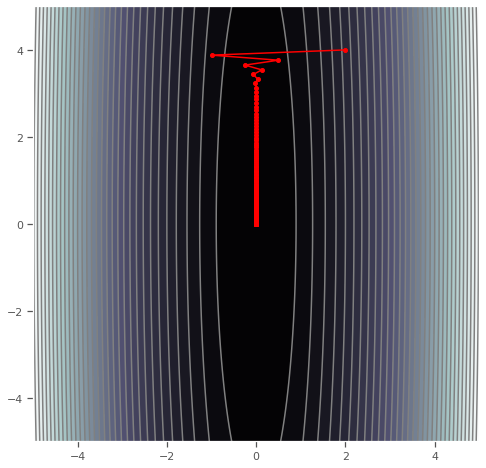

In [16]:
path = descent(Dp2, x0=[2, 4], l_rate=0.015, nsteps=1000)

plot_descent(p2, 
             xlim=(-5, 5),
             ylim=(-5, 5),
             path=path,
             levels=40
            );

In [17]:
def h(x):
    '''
    Himmelblau's function
    h(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2
    '''
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def Dh(x):
    return np.array([
        2 * (x[0]**2 + x[1] - 11) * 2 * x[0] + 2 * (x[0] + x[1]**2 - 7),
        2 * (x[0]**2 + x[1] - 11) + 2 * (x[0] + x[1]**2 - 7) * 2 * x[1]
    ])


def r(x):
    '''
    Rosenbrock function
    r(x, y) = (1-x)^2 + 100(y-x^2)^2
    '''
    return (1-x[0])**2 + 100*(x[1]-x[0]**2)**2

def Dr(x):
    return np.array([-2*(1-x[0]) - 400*(x[1]-x[0]**2)*x[0], 200*(x[1]-x[0]**2)])

In [ ]:
plot3d(h, (-5, 5), (-5, 5))

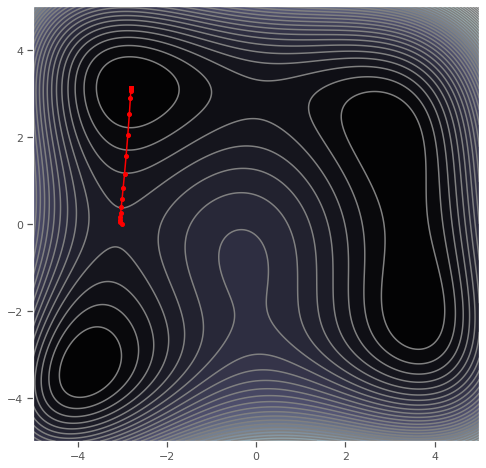

In [20]:
path = descent(Dh, x0=[-3, 0], l_rate=0.01, nsteps=1000)

plot_descent(h, 
             xlim=(-5, 5),
             ylim=(-5, 5),
             path=path,
             levels=40
            );

In [ ]:
plot3d(r, (-1.4, 1.4), (-0.5, 1.4))

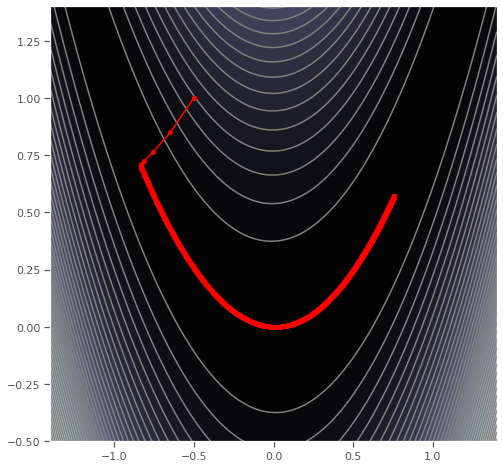

In [22]:
path = descent(Dr, x0=[-0.5, 1], l_rate=0.001, nsteps=2000)

plot_descent(r, 
             xlim=(-1.4, 1.4),
             ylim=(-0.5, 1.4),
             path=path,
             levels=40
            );

## Linear regression using sklearn

In [23]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [24]:
df

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [27]:
reg.fit(df[['total_bill']], df['tip'])

LinearRegression()

In [28]:
reg.coef_

array([0.10502452])

In [29]:
reg.intercept_

0.9202696135546731

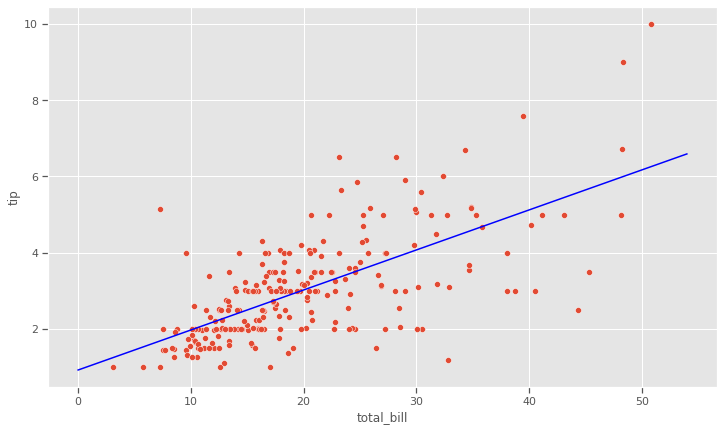

In [31]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='total_bill', y='tip', marker='o')
x = np.arange(0, 55)
plt.plot(x, reg.coef_[0]*x + reg.intercept_, c='b')

In [32]:
reg.predict([[100]])

/Users/bb/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([11.42272135])

In [33]:
df['regression'] = reg.predict(df[['total_bill']])
df

total_bill   tip     sex smoker   day    time  size  regression
0         16.99  1.01  Female     No   Sun  Dinner     2    2.704636
1         10.34  1.66    Male     No   Sun  Dinner     3    2.006223
2         21.01  3.50    Male     No   Sun  Dinner     3    3.126835
3         23.68  3.31    Male     No   Sun  Dinner     2    3.407250
4         24.59  3.61  Female     No   Sun  Dinner     4    3.502822
..          ...   ...     ...    ...   ...     ...   ...         ...
239       29.03  5.92    Male     No   Sat  Dinner     3    3.969131
240       27.18  2.00  Female    Yes   Sat  Dinner     2    3.774836
241       22.67  2.00    Male    Yes   Sat  Dinner     2    3.301175
242       17.82  1.75    Male     No   Sat  Dinner     2    2.791807
243       18.78  3.00  Female     No  Thur  Dinner     2    2.892630

[244 rows x 8 columns]

In [34]:
df['regression_error'] = df['regression'] - df['tip']
df

total_bill   tip     sex smoker   day    time  size  regression  \
0         16.99  1.01  Female     No   Sun  Dinner     2    2.704636   
1         10.34  1.66    Male     No   Sun  Dinner     3    2.006223   
2         21.01  3.50    Male     No   Sun  Dinner     3    3.126835   
3         23.68  3.31    Male     No   Sun  Dinner     2    3.407250   
4         24.59  3.61  Female     No   Sun  Dinner     4    3.502822   
..          ...   ...     ...    ...   ...     ...   ...         ...   
239       29.03  5.92    Male     No   Sat  Dinner     3    3.969131   
240       27.18  2.00  Female    Yes   Sat  Dinner     2    3.774836   
241       22.67  2.00    Male    Yes   Sat  Dinner     2    3.301175   
242       17.82  1.75    Male     No   Sat  Dinner     2    2.791807   
243       18.78  3.00  Female     No  Thur  Dinner     2    2.892630   

     regression_error  
0            1.694636  
1            0.346223  
2           -0.373165  
3            0.097250  
4           -0.107178  
..                ...  
239         -1.950869  
240          1.774836  
241          1.301175  
242          1.041807  
243         -0.107370  

[244 rows x 9 columns]

In [35]:
df['regression_error'].mean()

-5.223508328974097e-16

In [37]:
np.abs(df['regression_error']).describe()

count    244.000000
mean       0.745825
std        0.694074
min        0.002632
25%        0.276832
50%        0.541028
75%        0.999040
max        3.743435
Name: regression_error, dtype: float64

## Linear regression with total_bill and size

In [38]:
reg2 = LinearRegression()
reg2.fit(df[['total_bill', 'size']], df['tip'])

LinearRegression()

In [40]:
reg2.coef_

array([0.09271334, 0.19259779])

In [41]:
reg2.intercept_

0.6689447408125022

In [42]:
df['regression_2'] = reg2.predict(df[['total_bill', 'size']])
df

total_bill   tip     sex smoker   day    time  size  regression  \
0         16.99  1.01  Female     No   Sun  Dinner     2    2.704636   
1         10.34  1.66    Male     No   Sun  Dinner     3    2.006223   
2         21.01  3.50    Male     No   Sun  Dinner     3    3.126835   
3         23.68  3.31    Male     No   Sun  Dinner     2    3.407250   
4         24.59  3.61  Female     No   Sun  Dinner     4    3.502822   
..          ...   ...     ...    ...   ...     ...   ...         ...   
239       29.03  5.92    Male     No   Sat  Dinner     3    3.969131   
240       27.18  2.00  Female    Yes   Sat  Dinner     2    3.774836   
241       22.67  2.00    Male    Yes   Sat  Dinner     2    3.301175   
242       17.82  1.75    Male     No   Sat  Dinner     2    2.791807   
243       18.78  3.00  Female     No  Thur  Dinner     2    2.892630   

     regression_error  regression_2  
0            1.694636      2.629340  
1            0.346223      2.205394  
2           -0.373165      3.194645  
3            0.097250      3.249592  
4           -0.107178      3.719157  
..                ...           ...  
239         -1.950869      3.938206  
240          1.774836      3.574089  
241          1.301175      3.155952  
242          1.041807      2.706292  
243         -0.107370      2.795297  

[244 rows x 10 columns]

In [44]:
df['regression_2 error'] = df['regression_2'] - df['tip']
df

total_bill   tip     sex smoker   day    time  size  regression  \
0         16.99  1.01  Female     No   Sun  Dinner     2    2.704636   
1         10.34  1.66    Male     No   Sun  Dinner     3    2.006223   
2         21.01  3.50    Male     No   Sun  Dinner     3    3.126835   
3         23.68  3.31    Male     No   Sun  Dinner     2    3.407250   
4         24.59  3.61  Female     No   Sun  Dinner     4    3.502822   
..          ...   ...     ...    ...   ...     ...   ...         ...   
239       29.03  5.92    Male     No   Sat  Dinner     3    3.969131   
240       27.18  2.00  Female    Yes   Sat  Dinner     2    3.774836   
241       22.67  2.00    Male    Yes   Sat  Dinner     2    3.301175   
242       17.82  1.75    Male     No   Sat  Dinner     2    2.791807   
243       18.78  3.00  Female     No  Thur  Dinner     2    2.892630   

     regression_error  regression_2  regression_2 error  
0            1.694636      2.629340            1.619340  
1            0.346223      2.205394            0.545394  
2           -0.373165      3.194645           -0.305355  
3            0.097250      3.249592           -0.060408  
4           -0.107178      3.719157            0.109157  
..                ...           ...                 ...  
239         -1.950869      3.938206           -1.981794  
240          1.774836      3.574089            1.574089  
241          1.301175      3.155952            1.155952  
242          1.041807      2.706292            0.956292  
243         -0.107370      2.795297           -0.204703  

[244 rows x 11 columns]

In [46]:
np.abs(df[['regression_error', 'regression_2 error']]).describe()

regression_error  regression_2 error
count        244.000000          244.000000
mean           0.745825            0.739004
std            0.694074            0.685833
min            0.002632            0.002048
25%            0.276832            0.273011
50%            0.541028            0.536010
75%            0.999040            0.959264
max            3.743435            4.042497

## Linear regression and $R^2$

In [47]:
reg.score(df[['total_bill']], df['tip'])

0.45661658635167657

In [48]:
reg2.score(df[['total_bill', 'size']], df['tip'])

0.46786930879612587

## Linear regression with total_bill and day

In [50]:
import pandas as pd

pd.get_dummies(df['day'])

Thur  Fri  Sat  Sun
0       0    0    0    1
1       0    0    0    1
2       0    0    0    1
3       0    0    0    1
4       0    0    0    1
..    ...  ...  ...  ...
239     0    0    1    0
240     0    0    1    0
241     0    0    1    0
242     0    0    1    0
243     1    0    0    0

[244 rows x 4 columns]

In [51]:
df = pd.concat([df, pd.get_dummies(df['day'])], axis=1)
df

total_bill   tip     sex smoker   day    time  size  regression  \
0         16.99  1.01  Female     No   Sun  Dinner     2    2.704636   
1         10.34  1.66    Male     No   Sun  Dinner     3    2.006223   
2         21.01  3.50    Male     No   Sun  Dinner     3    3.126835   
3         23.68  3.31    Male     No   Sun  Dinner     2    3.407250   
4         24.59  3.61  Female     No   Sun  Dinner     4    3.502822   
..          ...   ...     ...    ...   ...     ...   ...         ...   
239       29.03  5.92    Male     No   Sat  Dinner     3    3.969131   
240       27.18  2.00  Female    Yes   Sat  Dinner     2    3.774836   
241       22.67  2.00    Male    Yes   Sat  Dinner     2    3.301175   
242       17.82  1.75    Male     No   Sat  Dinner     2    2.791807   
243       18.78  3.00  Female     No  Thur  Dinner     2    2.892630   

     regression_error  regression_2  regression_2 error  Thur  Fri  Sat  Sun  
0            1.694636      2.629340            1.619340     0    0    0    1  
1            0.346223      2.205394            0.545394     0    0    0    1  
2           -0.373165      3.194645           -0.305355     0    0    0    1  
3            0.097250      3.249592           -0.060408     0    0    0    1  
4           -0.107178      3.719157            0.109157     0    0    0    1  
..                ...           ...                 ...   ...  ...  ...  ...  
239         -1.950869      3.938206           -1.981794     0    0    1    0  
240          1.774836      3.574089            1.574089     0    0    1    0  
241          1.301175      3.155952            1.155952     0    0    1    0  
242          1.041807      2.706292            0.956292     0    0    1    0  
243         -0.107370      2.795297           -0.204703     1    0    0    0  

[244 rows x 15 columns]

In [52]:
reg3 = LinearRegression()
reg3.fit(df[['total_bill', 'Thur', 'Fri', 'Sat', 'Sun']], df['tip'])

LinearRegression()

In [53]:
reg3.coef_

array([ 0.1046728 , -0.01132963,  0.00755391, -0.07843209,  0.08220781])

In [54]:
reg.intercept_

0.9202696135546731

In [56]:
reg3.score(df[['total_bill', 'Thur', 'Fri', 'Sat', 'Sun']], df['tip'])

0.45887402603123395

## Regular expression

### String operations

In [1]:
s = "Hello there! How are you?"

In [2]:
s.lower()

'hello there! how are you?'

In [3]:
s.upper()

'HELLO THERE! HOW ARE YOU?'

In [4]:
s.split()

['Hello', 'there!', 'How', 'are', 'you?']

In [6]:
s.split('ll')

['He', 'o there! How are you?']

In [7]:
pieces = s.split()
pieces

['Hello', 'there!', 'How', 'are', 'you?']

In [8]:
"----".join(pieces)

'Hello----there!----How----are----you?'

In [10]:
"".join(pieces)

'Hellothere!Howareyou?'

In [11]:
s

'Hello there! How are you?'

In [12]:
s.find('there')

6

In [13]:
s[6:]

'there! How are you?'

In [14]:
s.find("bob")

-1

In [15]:
s.replace("re", "<RE>")

'Hello the<RE>! How a<RE> you?'

### Raw string

In [16]:
print("Hello\nthere\t!")

Hello
there	!


In [17]:
print("Hello\\nthere\\t!")

Hello\nthere\t!


In [18]:
print(r"Hello\nthere\t!")

Hello\nthere\t!


In [19]:
print("Hi \U0001F642")

Hi 🙂


In [20]:
print(r"Hi \U0001F642")

Hi \U0001F642


In [21]:
import re

In [22]:
sample = """I am writing in reference to the our conversation on Tuesday, March 2, 2021.
Your order of 100,000 units of GC-1344 microcontrollers has been confirmed.
You will be billed $19.50 per unit for the total of $1,950,000.00.
The expected delivery date is Friday, April 30, 2021. In case of any further
questions please contact our sales department by email support@simonis.biz,
phone (294) 934-0923 or fax (294) 934-0202.

Delfina Fischer
Manager, Simonis LLC
delfina.fisher@simonis.biz
(294) 934 0937
"""

In [24]:
print(sample)

I am writing in reference to the our conversation on Tuesday, March 2, 2021.
Your order of 100,000 units of GC-1344 microcontrollers has been confirmed.
You will be billed $19.50 per unit for the total of $1,950,000.00.
The expected delivery date is Friday, April 30, 2021. In case of any further
questions please contact our sales department by email support@simonis.biz,
phone (294) 934-0923 or fax (294) 934-0202.

Delfina Fischer
Manager, Simonis LLC
delfina.fisher@simonis.biz
(294) 934 0937



In [25]:
import html
import re
from IPython.core.display import display, HTML


def re_show(regex, text="", flags=0):
    """
    Displays text with the regex match highlighted.
    """
    text_css = '''"border-style: none;
                   border-width: 0px;
                   padding: 0px;
                   font-size: 14px;
                   color: darkslategray;
                   background-color: white;
                   white-space: pre;
                   line-height: 20px;"
                   '''
    match_css = '''"padding: 0px 1px 0px 1px;
                    margin: 0px 0.5px 0px 0.5px;
                    border-style: solid;
                    border-width: 0.5px;
                    border-color: darkred;
                    background-color: cornsilk;
                    color: red;"
                    '''

    r = re.compile(f"({regex})", flags=flags)
    t = r.sub(fr'###START###\1###END###', text)
    t = html.escape(t)
    t = t.replace("###START###", f"<span style={match_css}>")
    t = t.replace("###END###", f"</span>")
    display(HTML(f'<code style={text_css}>{t}</code>'))

In [26]:
re_show(r"the", sample)

In [27]:
re_show(r"the|The", sample)

In [28]:
re_show(r"T|the", sample)

In [29]:
re_show(r"(T|t)he", sample)

In [31]:
re_show(r"e.a", sample)

In [32]:
re_show(r"\w", sample)

In [33]:
re_show(r"\W", sample)

In [34]:
re_show(r"\d", sample)

In [35]:
re_show(r"[abc]", sample)

In [36]:
re_show(r"[a-kA-K]", sample)

In [37]:
re_show(r"[^a-kA-K]", sample)

In [38]:
re_show(r"[^a]", sample)

In [39]:
re_show(r"(a|A)[a-z]", sample)

In [40]:
re_show(r"\d\d\d", sample)

In [41]:
re_show(r"\d{3}", sample)

In [42]:
re_show(r"\d*", sample)

In [43]:
re_show(r"\d+", sample)

In [44]:
re_show(r"a\w?", sample)

In [45]:
re_show(r"Y.*u", sample)

In [46]:
re_show(r"Y.*?u", sample)

In [56]:
re_show(r"Y.*u", sample, flags=re.S)

In [57]:
re_show(r"the", sample)

In [58]:
re_show(r"the", sample, flags=re.I)

In [59]:
re_show(r"^\w", sample)

In [60]:
re_show(r"\w+$", sample)

In [61]:
re_show(r"^\w", sample, flags=re.M)

In [62]:
re_show(r"\w+$", sample, flags=re.M)

In [63]:
re_show("^.*2021.*$", sample, flags=re.M)

In [64]:
re_show(r"[A-Z][a-z]*, [A-Z][a-z]+ \d+, \d{4}", sample)

### re.findall()

In [65]:
re.findall(r"[A-Z][a-z]*, [A-Z][a-z]+ \d+, \d{4}", sample)

['Tuesday, March 2, 2021', 'Friday, April 30, 2021']

In [66]:
re.findall(r"\$[\d,.]*\d", sample)

['$19.50', '$1,950,000.00']

In [67]:
re.findall(r"\$([\d,.]*\d)", sample)

['19.50', '1,950,000.00']

### re.sub()

In [70]:
print(re.sub(r"\$[\d.,]*\d", "**AMOUNT**", sample))

I am writing in reference to the our conversation on Tuesday, March 2, 2021.
Your order of 100,000 units of GC-1344 microcontrollers has been confirmed.
You will be billed **AMOUNT** per unit for the total of **AMOUNT**.
The expected delivery date is Friday, April 30, 2021. In case of any further
questions please contact our sales department by email support@simonis.biz,
phone (294) 934-0923 or fax (294) 934-0202.

Delfina Fischer
Manager, Simonis LLC
delfina.fisher@simonis.biz
(294) 934 0937

